# Topic-Modelling

## What is Topic Modelling?
* a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.
* A document can be a part of multiple topics, kind of like in fuzzy clustering(soft clustering) in which each data point belongs to more than one cluster.

## Why Topic Modelling?
Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.
It can help with the following:
* discovering the hidden themes in the collection.
* classifying the documents into the discovered themes.
* using the classification to organize/summarize/search the documents.

For example, let’s say a document belongs to the topics food, dogs and health. So if a user queries “dog food”, they might find the above-mentioned document relevant because it covers those topics(among other topics). We are able to figure its relevance with respect to the query without even going through the entire document.
Therefore, by annotating the document, based on the topics predicted by the modeling method, we are able to optimize our search process.

In [2]:
import pandas as pd
import nltk
import os
from IPython.display import display
from datetime import datetime

In [3]:
for f in os.listdir(os.getcwd()):
    print(f)

main.ipynb
pdfToText.py
normalSimilarity.py
.0
a.txt
abcnews-date-text.csv
.ipynb_checkpoints
__pycache__
b.txt
abcnews-date-text.csv.zip


# Data-Extraction

Extract data from csv file as a dataframe object

In [4]:
data = pd.read_csv('abcnews-date-text.csv')
display(data.head())
display(data.tail())
print("Total number of entries are", len(data.index))

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


,publish_date,headline_text
1186013,20191231,vision of flames approaching corryong in victoria
1186014,20191231,wa police and government backflip on drug amne...
1186015,20191231,we have fears for their safety: victorian premier
1186016,20191231,when do the 20s start
1186017,20191231,yarraville shooting woman dead man critically ...


Total number of entries are 1186018


In [5]:
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text
display(documents.head())

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


# Preprocessing

1. **Tokenisation** : Split sentences into words(tokens)
2. Stop-words removal
3. remove all words with length < 3.
4. **Lemmatize** words: words in third person are changed to first person and verbs in past and future tenses are changed into present.
5. **Stemming** : words are reduced to their root form.

# Stemming

bringing a given word down to its root word, eliminating any information of tense it might be holding
* for instance, waiting-past tense of *wait*, hence the *stem* word is *wait*
* beautiful $\rightarrow$ beauty, hence spelling may also change while *stemming* a word

The main aim is to reduce the **inflectional** forms of each word into a common base word or root word or stem word.
Inflection is a process of word formation, in which a word is modified to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, mood, animacy, and definiteness.\

2 kinds of stemming mainly is done:
1. Over-Stemming
2. Under-Stemming

## Over-Stemming
Two words with different stems are stemmed to the same root. This is also known as a false positive.\
* universal
* university
* universe

All the above 3 words are stemmed to **univers**, which is wrong behavior.
Though these three words are etymologically related, their modern meanings are in widely different domains, so treating them as synonyms in NLP/NLU will likely reduce the relevance of the search results

## Under-Stemming
Two words that should be stemmed to the same root are not. This is also known as a false negative.
* alumnus
* alumni
* alumnae

## SnowballStemmer


# Lemmatization

describe what is lemmatizing words here

In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

# we need internet connection for this
# check in your ~/nltk_data/corpora for wordnet.zip
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/laferrari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if len(token) > 3 and token not in STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [8]:
# pick some random entry from the headlines dataframe object
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = nltk.word_tokenize(doc_sample)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


 tokenized and lemmatized document: 
['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']


In [9]:
tic1 = datetime.now()
processed_docs = documents['headline_text'].map(preprocess)
tot_time = datetime.now() - tic1
print("Total time of preprocessing was", tot_time,"s\n\n\n")
display(processed_docs.head())

Total time of preprocessing was 0:02:40.492712 s





0     [decid, communiti, broadcast, licenc]
1                        [wit, awar, defam]
2    [call, infrastructur, protect, summit]
3               [staff, aust, strike, rise]
4      [strike, affect, australian, travel]
Name: headline_text, dtype: object

In [10]:
tic1 = datetime.now()
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

tot_time = datetime.now()-tic1
print("total time required for this cell is,", tot_time)

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit
total time required for this cell is, 0:00:15.246656


We now proceed to filter out those words that dont occur in half of the documents, i.e. half of the processed headlines, and those that occur in less than 15 total documents.\
After this, we keep only the top 100,000 most frequent words/tokens. 

In [11]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

Convert each document to a bag-of-words, where we have an idea of each word's count in that document.

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[4310])

[(162, 1), (240, 1), (292, 1), (589, 1), (838, 1), (3567, 1), (3568, 1)]


In [12]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time(s).".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 162 ("govt") appears 1 time(s).
Word 240 ("group") appears 1 time(s).
Word 292 ("vote") appears 1 time(s).
Word 589 ("local") appears 1 time(s).
Word 838 ("want") appears 1 time(s).
Word 3567 ("compulsori") appears 1 time(s).
Word 3568 ("ratepay") appears 1 time(s).


# TF-IDF model

## Term Frequency (TF)
1. The number of times a word appears in a document divded by the total number of words in the document. 
2. Every document has its own term frequency.

## Inverse Data Frequency (IDF)
1. The log of the number of documents divided by the number of documents that contain the word w. 
2. Inverse data frequency determines the weight of rare words across all documents in the corpus.
3. IDF is a measure of how common any particular word or gram is in the given corpus that you are searching. It is an estimate of how rare that word is and thus its likely importance. So if a query contains an uncommon word, documents containing that rare word should be judged to be more important.

TFIDF is simply their product.

# Creating the TFIDF corpus

In [13]:
from gensim import corpora, models
from pprint import pprint

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5850076620505259),
 (1, 0.38947256567331934),
 (2, 0.4997099083387053),
 (3, 0.5063271308533074)]


<font color="red">bow_corpus</font>: (word-id, word-count in that document)\
<font color="green">corpus_tfidf</font>: (word-id, tfidf value of that word)

# LDA-Latent Dirichlet Allocation
[research paper link](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
* document = collection of words
* topic = also a collection of words

## Finding Representative Words for a Topic
* We can sort the words with respect to their probability score. The top x words are chosen from each topic to represent the topic. If x = 10, we’ll sort all the words in topic1 based on their score and take the top 10 words to represent the topic. This step may not always be necessary because if the corpus is small we can store all the words in sorted by their score.
* Alternatively, we can set a threshold on the score. All the words in a topic having a score above the threshold can be stored as its representative, in order of their scores.

<font color="maroon" size="5">Assumptions</font>
* Each document is just a collection of words or a “bag of words”. Thus, the order of the words and the grammatical role of the words (subject, object, verbs, …) are not considered in the model.
* Words like am/is/are/of/a/the/but/… don’t carry any information about the “topics” and therefore can be eliminated from the documents as a preprocessing step. In fact, we can eliminate words that occur in at least %80 ~ %90 of the documents, without losing any information. For example, if our corpus contains only medical documents, words like human, body, health, etc might be present in most of the documents and hence can be removed as they don’t add any specific information which would make the document stand out.
* We know beforehand how many topics we want. ‘k’ is pre-decided.
* All topic assignments except for the current word in question are correct, and then updating the assignment of the current word using our model of how documents are generated

The Algorithm is used to calculate the probability of words that belong to a topic.

## Steps
* Go through each document and randomly assign each word in the document to one of k topics (k is chosen beforehand).
* For each document d, go through each word w and compute :
    * p(topic t | document d): 
        * the proportion of words in document d that are assigned to topic t. 
        * Tries to capture how many words belong to the topic t for a given document d. 
        * <font color=red>Excluding the current word</font>. If a lot of words from d belongs to t, it is more probable that word w belongs to t.
    * p(word w| topic t): 
        * the proportion of assignments to topic t over all documents that come from this word w. 
        * Tries to capture how many documents are in topic t because of word w. 
        * LDA represents documents as a mixture of topics. Similarly, a topic is a mixture of words. If a word has high probability of being in a topic, all the documents having w will be more strongly associated with t as well. Similarly, if w is not very probable to be in t, the documents which contain the w will be having very low probability of being in t, because rest of the words in d will belong to some other topic and hence d will have a higher probability for those topic. So even if w gets added to t, it won’t be bringing many such documents to t.
  
* Update the probability for the word w belonging to topic t, as: p(word with topic t) = p(topic t | document d) $\times$p(word w | topic t)

## Example
Following is an example to demonstrate the steps enumerated above.
1. Suppose you have various photographs(documents) with captions(words). You want to display them in a gallery so you decide to categorize the photographs on various themes(topics) based on which you will create different sections in your gallery.
2. suppose you decide to create k=2 sections in your album — nature and city.The classification isn’t so clear as some photographs with city have trees and flowers while the nature ones might have some buildings in it. 
3. You decide to assign the photographs which only have nature or city elements in them into their respective categories while you randomly assigned the rest.
4. You notice that a lot of photographs in nature have the word tree in their captions. So you concluded that the word tree and topic nature must be closely related.
5. Next, you pick the word building and check how many photographs are in nature because they have the word building in their caption. You don’t find many and now are less sure about building belonging to the topic nature and associate it more strongly with the topic city.
6. You then pick a photograph which has the caption “The tree is in front of the building and behind a car” and see that it is in the category nature currently.
    1. You then chose the word tree, and calculate the first probability p(topic t | document d): other words in the caption are building and car, most photographs having captions with building or car in it are in city, so you get a low probability.
    2. Now,for the second probability p(word w | topic t): we know that a lot of photographs in nature have the word trees in it. So you get a high score here.
    3. You update the probability of tree belonging in nature by multiplying the two. You get a lower value than before for *tree* in **topic nature** because now you have seen that tree and words such as building/car in the same caption, implying that *trees can also be found in cities*.
    4. For the same reason, when you update the probability for tree belonging in topic city, you will notice that it will be greater than what it was before.(initially, since tree was assigned nature, this means that p(w=tree|t=city) = 1-p(w=tree|t=nature), will increase, and it initially had a very low value.
7. After multiple iterations over all the photographs and for each topic, you will have accurate scores for each word with respect to each topic. 
8. Your guesses will keep getting better and better because you’ll conclude from the context that words such as buildings, sidewalk, subway appear together and hence must belong to the same topic, which we can easily guess is city.
9. Words such as mountains, fields, beach which might not appear together in a lot of captions but they do appear often without city words and hence will have higher scores for nature.
10. While words such as trees, flowers, dogs, sky will have almost the same probability of being in either as they occur in both topics.

# Creating LDA models

## choose the best model
* instantiate models for different k-values, and plot the coherence scores.
* If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.

In [15]:
from gensim.models import LdaMulticore, CoherenceModel
time_list, coherence_scores = [], {}
for k in range(2, 40, 6):
    tic1 = datetime.now()
    print("Model with k={} was instanced on {}".format(k, tic1))
    lda_model = LdaMulticore(bow_corpus, num_topics=k, id2word=dictionary, passes=2, workers=2)
    tot_time = datetime.now()-tic1
    print("time to complete model with k={} was {}".format(k, tot_time))
    time_list.append(tot_time)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores[k] = coherence_lda

Model with k=2 was instanced on 2020-06-01 17:15:33.579096
time to complete model with k=2 was 0:05:49.056046
Model with k=8 was instanced on 2020-06-01 17:21:34.087284
time to complete model with k=8 was 0:05:32.669257
Model with k=14 was instanced on 2020-06-01 17:27:32.607774
time to complete model with k=14 was 0:05:19.595673
Model with k=20 was instanced on 2020-06-01 17:33:33.833339
time to complete model with k=20 was 0:05:08.897460
Model with k=26 was instanced on 2020-06-01 17:39:33.321191
time to complete model with k=26 was 0:04:53.147767
Model with k=32 was instanced on 2020-06-01 17:45:26.931020
time to complete model with k=32 was 0:04:42.840440
Model with k=38 was instanced on 2020-06-01 17:51:10.116624
time to complete model with k=38 was 0:04:55.929103


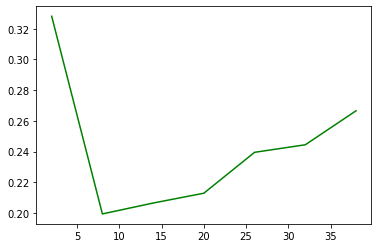

In [19]:
import matplotlib.pyplot as plt
plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), c='g')
plt.show()

In [14]:
tic1 = datetime.now()
lda_model = LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
tot_time = datetime.now()-tic1
print("Total time of training the LDA model is", tot_time)

Total time of training the LDA model is 0:05:19.470929


In [15]:
for ind, topic in lda_model.print_topics(-1):
    print('Topic: {} \n Words: {}'.format(ind, topic))

Topic: 0 
 Words: 0.022*"hous" + 0.021*"south" + 0.019*"canberra" + 0.019*"north" + 0.016*"bushfir" + 0.016*"miss" + 0.013*"interview" + 0.011*"hospit" + 0.010*"investig" + 0.010*"search"
Topic: 1 
 Words: 0.031*"kill" + 0.023*"shoot" + 0.021*"dead" + 0.019*"attack" + 0.019*"polic" + 0.016*"protest" + 0.014*"offic" + 0.013*"assault" + 0.013*"chines" + 0.011*"bodi"
Topic: 2 
 Words: 0.059*"australia" + 0.048*"australian" + 0.027*"world" + 0.018*"test" + 0.014*"win" + 0.011*"farm" + 0.011*"final" + 0.011*"return" + 0.010*"beat" + 0.009*"cricket"
Topic: 3 
 Words: 0.031*"polic" + 0.030*"charg" + 0.027*"court" + 0.025*"death" + 0.025*"murder" + 0.021*"woman" + 0.018*"die" + 0.018*"face" + 0.017*"alleg" + 0.016*"crash"
Topic: 4 
 Words: 0.018*"chang" + 0.014*"speak" + 0.014*"power" + 0.013*"worker" + 0.012*"climat" + 0.011*"concern" + 0.011*"minist" + 0.011*"say" + 0.011*"john" + 0.010*"flood"
Topic: 5 
 Words: 0.021*"market" + 0.020*"news" + 0.018*"women" + 0.018*"live" + 0.016*"tasmania" 

In [16]:
for i, j in lda_model.show_topics():
    print('index={}, topic={}'.format(i, j))
    print("\n\n")
# print(lda_model.get_topic_terms())

index=0, topic=0.022*"hous" + 0.021*"south" + 0.019*"canberra" + 0.019*"north" + 0.016*"bushfir" + 0.016*"miss" + 0.013*"interview" + 0.011*"hospit" + 0.010*"investig" + 0.010*"search"



index=1, topic=0.031*"kill" + 0.023*"shoot" + 0.021*"dead" + 0.019*"attack" + 0.019*"polic" + 0.016*"protest" + 0.014*"offic" + 0.013*"assault" + 0.013*"chines" + 0.011*"bodi"



index=2, topic=0.059*"australia" + 0.048*"australian" + 0.027*"world" + 0.018*"test" + 0.014*"win" + 0.011*"farm" + 0.011*"final" + 0.011*"return" + 0.010*"beat" + 0.009*"cricket"



index=3, topic=0.031*"polic" + 0.030*"charg" + 0.027*"court" + 0.025*"death" + 0.025*"murder" + 0.021*"woman" + 0.018*"die" + 0.018*"face" + 0.017*"alleg" + 0.016*"crash"



index=4, topic=0.018*"chang" + 0.014*"speak" + 0.014*"power" + 0.013*"worker" + 0.012*"climat" + 0.011*"concern" + 0.011*"minist" + 0.011*"say" + 0.011*"john" + 0.010*"flood"



index=5, topic=0.021*"market" + 0.020*"news" + 0.018*"women" + 0.018*"live" + 0.016*"tasmania" + 0

Display the first topic

In [17]:
print(''.join(["*"*30])+"topn=10 start"+''.join(["*"*30]))
for i, j in lda_model.show_topic(0, 10):
    print('word={}, prob={}'.format(i, round(j, 5)))
    print()
print(''.join(["*"*30])+"topn=10 done"+''.join(["*"*30]))

print(''.join(["*"*30])+"topn=20 start"+''.join(["*"*30]))
for i, j in lda_model.show_topic(0, 20):
    print('word={}, prob={}'.format(i, round(j, 5)))
    print()
print(''.join(["*"*30])+"topn=20 done"+''.join(["*"*30]))

******************************topn=10 start******************************
word=hous, prob=0.02160000056028366

word=south, prob=0.021490000188350677

word=canberra, prob=0.01899000070989132

word=north, prob=0.018859999254345894

word=bushfir, prob=0.016330000013113022

word=miss, prob=0.01565999910235405

word=interview, prob=0.012900000438094139

word=hospit, prob=0.010769999586045742

word=investig, prob=0.010110000148415565

word=search, prob=0.009759999811649323

******************************topn=10 done******************************
******************************topn=20 start******************************
word=hous, prob=0.02160000056028366

word=south, prob=0.021490000188350677

word=canberra, prob=0.01899000070989132

word=north, prob=0.018859999254345894

word=bushfir, prob=0.016330000013113022

word=miss, prob=0.01565999910235405

word=interview, prob=0.012900000438094139

word=hospit, prob=0.010769999586045742

word=investig, prob=0.010110000148415565

word=search, prob=0.0

Observe that the 2nd argument in show_topic() function, viz **topn**, can be given values > 10(num_topics argument given during the model initialisation), and the topics are descending sorted w.r.t. their dirichlet distribution scores

## Running LDA using the TFIDF corpus

In [21]:
from gensim.models import LdaMulticore, CoherenceModel
time_list, coherence_scores = [], {}
for k in range(10, 100, 10):
    tic1 = datetime.now()
    print("Model with k={} was instanced on {}".format(k, tic1))
    lda_model = LdaMulticore(corpus_tfidf, num_topics=k, id2word=dictionary, passes=1, workers=3)
    tot_time = datetime.now()-tic1
    print("time to complete model with k={} was {}".format(k, tot_time))
    time_list.append(tot_time)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores[k] = coherence_lda

Model with k=10 was instanced on 2020-06-01 18:24:41.035980
time to complete model with k=10 was 0:03:44.551775
Model with k=20 was instanced on 2020-06-01 18:28:55.443953


Process ForkPoolWorker-51:
Process ForkPoolWorker-52:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 337, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.

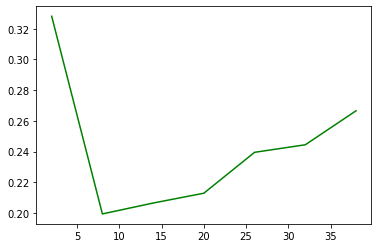

In [19]:
import matplotlib.pyplot as plt
plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), c='g')
plt.show()

In [18]:
tic1 = datetime.now()
lda_tfidf_model = LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
tot_time = datetime.now()-tic1
print('total training time for model is', tot_time)
for ind, topic in lda_tfidf_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(ind, topic))

total training time for model is 0:05:06.376622
Topic: 0 
Words: 0.017*"crash" + 0.010*"die" + 0.010*"climat" + 0.008*"miss" + 0.008*"wednesday" + 0.008*"fatal" + 0.008*"sport" + 0.008*"search" + 0.007*"grandstand" + 0.007*"peter"
Topic: 1 
Words: 0.022*"news" + 0.016*"rural" + 0.012*"queensland" + 0.008*"friday" + 0.008*"nation" + 0.007*"drought" + 0.007*"farm" + 0.007*"farmer" + 0.007*"morrison" + 0.007*"dollar"
Topic: 2 
Words: 0.028*"trump" + 0.012*"royal" + 0.009*"commiss" + 0.009*"monday" + 0.008*"thursday" + 0.007*"john" + 0.006*"senat" + 0.006*"say" + 0.006*"abbott" + 0.006*"tree"
Topic: 3 
Words: 0.012*"interview" + 0.010*"market" + 0.010*"australia" + 0.008*"australian" + 0.008*"live" + 0.007*"world" + 0.007*"cricket" + 0.006*"david" + 0.006*"share" + 0.006*"zealand"
Topic: 4 
Words: 0.010*"scott" + 0.008*"leagu" + 0.008*"rugbi" + 0.007*"outback" + 0.007*"histori" + 0.007*"jam" + 0.006*"brief" + 0.005*"grand" + 0.005*"georg" + 0.005*"data"
Topic: 5 
Words: 0.012*"govern" + 0.

# Performance evaluation by classifying sample document using LDA Bag of Words model

## Visualize topic keywords

* Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

* A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

* A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

* Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

On surfing the net, I found that the default algorithm, *mds*(pcoa), is <font color="red">unstable</font>, and hence the *prepare* step takes about 17 min.\
Hence use the mmds algorithm instead.\
<font color="red" size="4">Note: </font>If this still doesn't improve the speed, it might be because of running in a virtual environment. [Comments of this post](https://stackoverflow.com/questions/56707416/pyldavis-prepare-is-slow) claim that running inside a virtual environment results in strikingly slower speed, w.r.t. python3 installed on machine.

In [20]:
# Visualize the topics
# import pyLDAvis
import pyLDAvis.gensim
tic1 = datetime.now()
pyLDAvis.enable_notebook()
print("Time to enable pyLDAvis is:{}\n".format(datetime.now()-tic1))

tic1 = datetime.now()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
print("Time to prepare pyLDAvis is:{}\n\n\n".format(datetime.now()-tic1))
vis

Time to enable pyLDAvis is:0:00:00.000205



/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Time to prepare pyLDAvis is:0:17:44.587514





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.187451  0.084184       1        1  11.980048
3      0.203714  0.189695       2        1  10.884151
5      0.052967 -0.287178       3        1  10.436221
4     -0.170358  0.026991       4        1  10.327317
9     -0.208822  0.080443       5        1  10.089189
2      0.095006 -0.282747       6        1  10.015703
0      0.055003 -0.050999       7        1   9.662029
6     -0.204657 -0.004956       8        1   9.233929
1      0.163490  0.180418       9        1   8.768364
8      0.201108  0.064149      10        1   8.603042, topic_info=     Category          Freq        Term         Total  loglift  logprob
37    Default  31594.000000   australia  31594.000000  30.0000  30.0000
16    Default  25612.000000  australian  25612.000000  29.0000  29.0000
6665  Default  19623.000000       trump  19623.000000  28.0000  28.0000
761   Default  17587.000000       elect  17587.000000  27.0000  27.0000
236   Default  30244.000000       polic  30244.000000  26.0000  26.0000
...       ...           ...         ...           ...      ...      ...
1495  Topic10   3761.119629        game   5644.474121   2.0471  -4.8063
328   Topic10   4142.789062        jail   8623.465820   1.7199  -4.7097
2679  Topic10   2920.907959       video   4424.099121   2.0379  -5.0592
236   Topic10   3355.546143       polic  30244.792969   0.2543  -4.9204
109   Topic10   3078.295898        home  11361.203125   1.1472  -5.0067

[412 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
322       1  0.997797  aborigin
322      10  0.002062  aborigin
1891     10  0.999796      abus
211       2  0.890955     accus
211       5  0.108952     accus
...     ...       ...       ...
356      10  0.995047     young
114       1  0.998846     youth
114       5  0.000558     youth
114      10  0.000279     youth
383       8  0.999817   zealand

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 6, 5, 10, 3, 1, 7, 2, 9])

## Evaluate topics for a particular document

In [21]:
print(processed_docs[0])

['decid', 'communiti', 'broadcast', 'licenc']


In [22]:
print(bow_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [23]:
print(lda_model[bow_corpus[0]])

[(0, 0.41999254), (1, 0.020004254), (2, 0.020004254), (3, 0.020004254), (4, 0.020004254), (5, 0.020004254), (6, 0.21994638), (7, 0.22003132), (8, 0.020004254), (9, 0.020004254)]


In [ ]:
x = lda_model[bow_corpus[0]]
print("Original list={}".format(x))
x = sorted(x, key=lambda tup: -1*tup[1])
print("New list={}".format(x))

In [24]:
top_topic_list = lda_model.top_topics(corpus=bow_corpus)
print(len(top_topic_list))

10


In [25]:
print(top_topic_list[0])

([(0.030688798, 'polic'), (0.02998921, 'charg'), (0.026902873, 'court'), (0.025279678, 'death'), (0.024902096, 'murder'), (0.0207365, 'woman'), (0.01781122, 'die'), (0.017638607, 'face'), (0.017165683, 'alleg'), (0.01565655, 'crash'), (0.013857137, 'accus'), (0.013231679, 'trial'), (0.011952827, 'case'), (0.0115669845, 'guilti'), (0.011497213, 'victoria'), (0.010596322, 'road'), (0.01047113, 'driver'), (0.00961268, 'hear'), (0.009141206, 'victorian'), (0.008351579, 'arrest')], -4.761285740524762)


Sort the words in a document w.r.t. their dirichlet probability values in a descending manner

In [26]:
for ind, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(ind, 10)))


Score: 0.41999250650405884	 
Topic: 0.022*"hous" + 0.021*"south" + 0.019*"canberra" + 0.019*"north" + 0.016*"bushfir" + 0.016*"miss" + 0.013*"interview" + 0.011*"hospit" + 0.010*"investig" + 0.010*"search"

Score: 0.22003132104873657	 
Topic: 0.015*"nation" + 0.014*"farmer" + 0.013*"time" + 0.013*"rural" + 0.013*"council" + 0.013*"indigen" + 0.011*"commiss" + 0.011*"plan" + 0.011*"drum" + 0.011*"communiti"

Score: 0.21994638442993164	 
Topic: 0.036*"elect" + 0.018*"water" + 0.018*"state" + 0.016*"tasmanian" + 0.012*"labor" + 0.011*"liber" + 0.011*"morrison" + 0.011*"parti" + 0.010*"campaign" + 0.010*"give"

Score: 0.020004253834486008	 
Topic: 0.031*"kill" + 0.023*"shoot" + 0.021*"dead" + 0.019*"attack" + 0.019*"polic" + 0.016*"protest" + 0.014*"offic" + 0.013*"assault" + 0.013*"chines" + 0.011*"bodi"

Score: 0.020004253834486008	 
Topic: 0.059*"australia" + 0.048*"australian" + 0.027*"world" + 0.018*"test" + 0.014*"win" + 0.011*"farm" + 0.011*"final" + 0.011*"return" + 0.010*"beat" +

## Evaluate using Perplexity and coherence scores

* Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.
* People in the NLP community prefer topic coherence score, in particular.

In [27]:
from gensim.models import CoherenceModel

# Compute Perplexity
tic1 = datetime.now()
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.
tot_time = datetime.now() - tic1
print("Time to compute perplexity is {}s".format(tot_time))

# Compute Coherence Score
tic1 = datetime.now()
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
tot_time = datetime.now() - tic1
print("Time to compute coherence score is {}s".format(tot_time))


Perplexity:  -8.84560122283682
Time to compute perplexity is 0:04:08.483101s

Coherence Score:  0.2295940079410736
Time to compute coherence score is 0:00:33.320570s


## Performance evaluation by classifying sample document using LDA TF-IDF model

## Visualize topic keywords

* Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

* A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

* A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

* Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

In [ ]:
# Visualize the topics
# import pyLDAvis
import pyLDAvis.gensim
tic1 = datetime.now()
pyLDAvis.enable_notebook()
print("Time to enable pyLDAvis is:{}s\n".format(datetime.now()-tic1))

tic1 = datetime.now()
vis = pyLDAvis.gensim.prepare(lda_tfidf_model, corpus_tfidf, dictionary, mds='mmds')
print("Time to prepare pyLDAvis is:{}s\n\n\n".format(datetime.now()-tic1))
vis

## Evaluate topics for a particular document

In [ ]:
print(corpus_tfidf[4310], processed_docs[4310])

In [ ]:
for index, score in sorted(lda_tfidf_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 2)))

## Evaluate using Perplexity and coherence scores

* Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.
* People in the NLP community prefer topic coherence score, in particular.

In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity
tic1 = datetime.now()
print('\nPerplexity: ', lda_tfidf_model.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.
tot_time = datetime.now() - tic1
print("Time to compute perplexity is {}s".format(tot_time))

# Compute Coherence Score
tic1 = datetime.now()
coherence_model_lda = CoherenceModel(model=lda_tfidf_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
tot_time = datetime.now() - tic1
print("Time to compute coherence score is {}s".format(tot_time))

## find dominant topic for a document

In [37]:
def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    tic1 = datetime.now()
    size = len(ldamodel[corpus])
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):    
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution(% contrib) and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
        if i % 10000 == 0:
            progress = round((i/size)*100, 3)
            print("{}% completed in time {}".format(progress, datetime.now()-tic1))
                
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

tic1 = datetime.now()
print("Time of issuing command:{}".format(tic1))
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

tic1 = datetime.now()
print("Time of completion of command:{}".format(tic1))

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
# df_dominant_topic.head(10)

Time of issuing command:2020-06-01 12:48:07.717466
0.0% completed in time 0:00:00.009350
0.843% completed in time 0:00:42.616524
1.686% completed in time 0:01:27.484079
2.529% completed in time 0:02:21.150710
3.373% completed in time 0:03:30.126089
4.216% completed in time 0:04:51.614676
5.059% completed in time 0:06:02.301676
5.902% completed in time 0:07:19.103093
6.745% completed in time 0:08:42.268710
7.588% completed in time 0:10:12.931465
8.432% completed in time 0:11:47.699571
9.275% completed in time 0:13:28.655612
10.118% completed in time 0:15:15.303031
10.961% completed in time 0:17:07.756615
11.804% completed in time 0:19:20.061548
12.647% completed in time 0:21:29.056208
13.491% completed in time 0:23:40.696063
14.334% completed in time 0:25:57.207963
15.177% completed in time 0:28:21.280857
16.02% completed in time 0:30:51.569331
16.863% completed in time 0:33:27.586731
17.706% completed in time 0:36:09.696563
18.549% completed in time 0:38:56.927463
19.393% completed in 

KeyboardInterrupt: 

In [49]:
row = lda_model[bow_corpus][0]
print(row)
# for i in bow_corpus[0]:
#     print(dictionary[i[0]], i[1])
row = sorted(row, key=lambda x: (x[1]), reverse=True)
print(row)
# Get the Dominant topic, Perc Contribution(% contrib) and Keywords for each document
for j, (topic_num, prop_topic) in enumerate(row):
    if j == 0:  # => dominant topic
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        print([int(topic_num), wp[int(topic_num)], round(prop_topic,4), topic_keywords])
#         sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
    else:
        break

[(0, 0.4199925), (1, 0.020004254), (2, 0.020004254), (3, 0.020004254), (4, 0.020004254), (5, 0.020004254), (6, 0.21994638), (7, 0.22003132), (8, 0.020004254), (9, 0.020004254)]
[(0, 0.4199925), (7, 0.22003132), (6, 0.21994638), (1, 0.020004254), (2, 0.020004254), (3, 0.020004254), (4, 0.020004254), (5, 0.020004254), (8, 0.020004254), (9, 0.020004254)]
[0, ('hous', 0.021601964), 0.42, 'hous, south, canberra, north, bushfir, miss, interview, hospit, investig, search']


## Testing
testing on an unseen document

In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
print(preprocess(unseen_document), "\n\n\n")
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))